<a href="https://colab.research.google.com/github/hyeonu96/first-repository/blob/main/%5BEX_05%5D%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0%EB%A5%BC_%EB%A7%8C%EB%93%A4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 : 가위바위보 분류기를 만들자

라이브러리 버전을 확인해 봅니다

In [19]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [26]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PIL 라이브러리 import 완료!


데이터를 준비하자

https://teachablemachine.withgoogle.com/ 의 사이트를 통해 쉽게 데이터를 만들 수 있다.
데이터를 원하는 파일이 있는 곳에 저장.

데이터 불러오기 + Resize 하기

In [7]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


가위 이미지를 28X28 사이즈로 변경!

In [27]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/S"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

104  images to be resized.
104  images resized.
가위 이미지 resize 완료!


바위 이미지를 28X28로 변경!

In [28]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/R"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

106  images to be resized.
106  images resized.
바위 이미지 resize 완료!


보 이미지를 28X28로 변경 !

In [30]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/P"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

106  images to be resized.
106  images resized.
보 이미지 resize 완료!


이미지 라벨링 하기

In [35]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob("/content/drive/MyDrive/Colab Notebooks/S"+'/S/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob("/content/drive/MyDrive/Colab Notebooks/R"+'/R/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob("/content/drive/MyDrive/Colab Notebooks/P"+'/P/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path ="/content/drive/MyDrive/Colab Notebooks/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


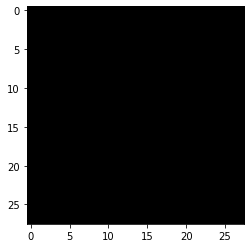

In [25]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 설계

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

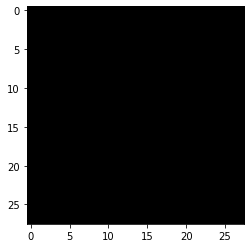

51 번째 이미지는 바로  0 입니다.


In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#model.summary()
#model.compile(optimizer='adam',
    #         loss='sparse_categorical_crossentropy',
     #        metrics=['accuracy'])

model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


index=50     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

딥러닝 네트워크 학습

In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 61ms/step - loss: 2.2950 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 1s 68ms/step - loss: 2.2771 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 1s 74ms/step - loss: 2.2591 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 1s 63ms/step - loss: 2.2413 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1s 62ms/step - loss: 2.2235 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 1s 68ms/step - loss: 2.2057 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 66ms/step - loss: 2.1880 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 1s 61ms/step - loss: 2.1704 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 1s 71ms/step - loss: 2.1528 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 1s 64ms/step - loss: 2.1353 - accuracy: 1.0000


테스트셋 만들기

In [39]:
def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path ="/content/drive/MyDrive/Colab Notebooks/"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 0 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


Accuracy 측정

In [40]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.9520 - accuracy: 1.0000 - 238ms/epoch - 24ms/step
test_loss: 1.9519661664962769 
test_accuracy: 1.0


회고

경로 설정에 문제가 있어 결과값이 도출되지 않는 점

흐름을 파악하기 위해 모든 코드 작성

resize 시 testset 또한 resize 해줘야 하는점 주의

왜 사진이 나오지 않았는지 모르는 점.